In [220]:
%matplotlib ipympl
from impedance.models.circuits import CustomCircuit
import numpy as np
import matplotlib.pyplot as plt

c = CustomCircuit(initial_guess=[100,1e-3],circuit="p(R_1,C_1)")
z_exp=c.predict(frequencies=np.logspace(-2,3,100))

# plt.plot(np.real(z_exp),-np.imag(z_exp),"o",ms=5)
# plt.gca().text(0.5,0.5,"Experimental Data",transform=plt.gca().transAxes)
# plt.gca().set_aspect("equal")

# c2=CustomCircuit(initial_guess=[10,1e-3],circuit="p(R_1,C_1)")
# c2.fit(impedance=z_exp,frequencies=np.logspace(-3,3,100))
# print(c2)

 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 454410.45022914413
       x: [ 1.000e+02  4.252e-02]
     nit: 3
   direc: [[ 1.000e+00  0.000e+00]
           [-4.313e-06  1.054e-05]]
    nfev: 67
#########
     message: `xtol` termination condition is satisfied.
     success: True
      status: 3
         fun: [ 4.544e+05]
           x: [ 1.000e+02  4.252e-02]
        cost: 103245152947.24925
         jac: [[ 5.120e+03 -4.410e+03]]
        grad: [ 2.326e+09 -2.004e+09]
  optimality: 2326431837.364982
 active_mask: [ 0.000e+00  0.000e+00]
        nfev: 190
        njev: 178


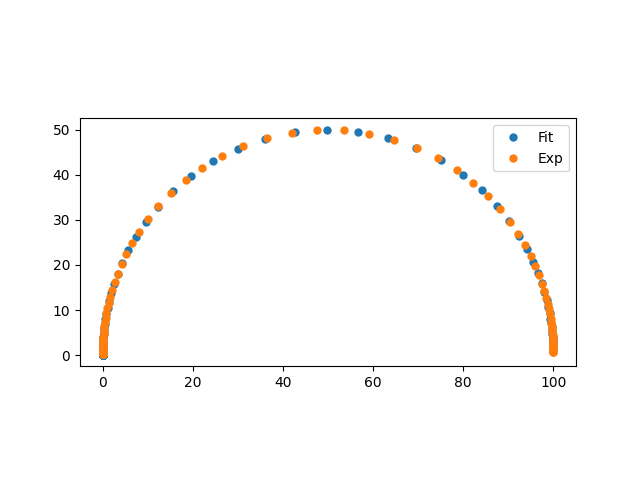

In [228]:
from scipy.optimize import minimize, least_squares

omega=2*np.pi*np.logspace(-3,3,100)

import numpy as np
def fun(params,omega,z_exp,weights):
    R1=params[0]
    C1=params[1]
    # R0=100 
    # C0=1e-3
    R0=1 
    C0=1
    chi_total=0
    for w,z,wt in zip(omega,z_exp,weights):

        z_model=1/(1/(R1*R0)+1j*(C1*C0)*w)
        chi_real=(np.real(z_model)-np.real(z))**2/wt**2
        chi_imag=(np.imag(z_model)-np.imag(z))**2/wt**2
        chi_total+=(chi_real+chi_imag)

    return chi_total


omega=np.logspace(-3,3,100)
wt=np.abs(z_exp)
wt=np.ones(len(z_exp))
wt=omega

result=minimize(fun,(100,2e-3),args=(omega,z_exp,wt),method="Powell",options={'return_all': False})
print(result)

result2=least_squares(fun,(100,2e-3),args=(omega,z_exp,wt))
print("#########")
print(result2)

cc = CustomCircuit(initial_guess=[result.x[0],result.x[1]],circuit="p(R_1,C_1)")
z_fit = cc.predict(frequencies=np.logspace(-3,3,100))

plt.cla()
plt.plot(np.real(z_fit),-np.imag(z_fit),"o",ms=5,label="Fit")
plt.plot(np.real(z_exp),-np.imag(z_exp),"o",ms=5,label="Exp")
plt.gca().set_aspect("equal")
plt.legend()
plt.show()